In [ ]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.stattools import coint
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

tickers = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLV', 'XLY', 'XLU']
# XCU, XRE
prices = yf.download(tickers, start = '2015-07-22', end = '2020-07-22')['Close']

prices.dropna(inplace=True)
returns = prices.pct_change().dropna()

scaler = StandardScaler()
returns_scaled = scaler.fit_transform(returns.T)

returns_scaled



C:\Users\anair26\AppData\Local\Temp\ipykernel_22284\747983684.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(tickers, start = '2015-07-22', end = '2020-07-22')['Close']
[*********************100%***********************]  9 of 9 completed


array([[-1.54162178, -1.229724  , -0.84807948, ...,  0.43585745,
        -0.44485105, -0.16109453],
       [ 1.2830269 , -0.92385135, -1.28902581, ..., -1.67236852,
        -1.0344153 ,  2.56359217],
       [-0.31655394,  0.1687826 , -0.32266383, ..., -1.13616815,
        -0.14317393,  0.41743748],
       ...,
       [-1.61758451,  1.33810612,  2.34371849, ...,  1.77139741,
        -0.7748162 , -0.38240866],
       [ 0.70778922, -1.57757614,  0.51121286, ...,  0.93319103,
         0.18303401, -0.65684062],
       [ 0.2352452 ,  1.23187546, -0.36499428, ..., -0.79740596,
         1.38128729, -0.54054445]])

In [33]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(returns_scaled)

pca_components

array([[ 10.21228526,  -1.53251058],
       [ 36.10648543,  30.90266819],
       [ 12.76980251, -11.64775256],
       [  6.66463181,  -5.61449254],
       [ -0.24601306, -19.28087987],
       [-20.02781439,   5.58760328],
       [-37.05728905,  24.06998058],
       [ -8.9212231 , -10.23070841],
       [  0.4991346 , -12.2539081 ]])

In [29]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(pca_components)

labels

array([0, 2, 0, 0, 0, 1, 1, 0, 0], dtype=int32)

In [30]:
cluster_df = pd.DataFrame({
    'ETF': returns.columns,
    'Cluster': labels,
    'PC1': pca_components[:, 0],
    'PC2': pca_components[:, 1]
})

cluster_df

,ETF,Cluster,PC1,PC2
0,XLB,0,10.212285,-1.532511
1,XLE,2,36.106485,30.902668
2,XLF,0,12.769803,-11.647753
3,XLI,0,6.664632,-5.614493
4,XLK,0,-0.246013,-19.280880
5,XLP,1,-20.027814,5.587603
6,XLU,1,-37.057289,24.069981
7,XLV,0,-8.921223,-10.230708
8,XLY,0,0.499135,-12.253908


<Axes: xlabel='PC1', ylabel='PC2'>

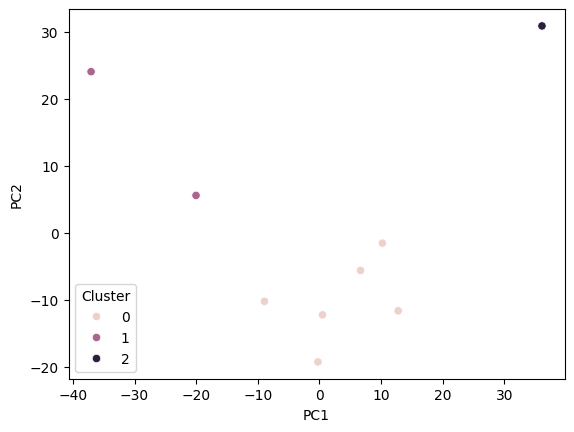

In [31]:
sns.scatterplot(data=cluster_df, x='PC1', y='PC2', hue='Cluster')


In [ ]:

'''
3 Cluster results:

0 - XLB, XLF, XLI, XLK,XLV,XLY
1 - XLU, XLP
2 - XLE

5 cluster results:

0 - XLB, XLF, XLI
1 - XLU
2 - XLE
3 - XLP
4 - XLV, XLK, XLY
    

'''
cluster_df = cluster_df.sort_values(by='Cluster')

cluster_df


,ETF,Cluster,PC1,PC2
0,XLB,0,10.212285,-1.532511
2,XLF,0,12.769803,-11.647753
3,XLI,0,6.664632,-5.614493
4,XLK,0,-0.246013,-19.280880
7,XLV,0,-8.921223,-10.230708
8,XLY,0,0.499135,-12.253908
6,XLU,1,-37.057289,24.069981
5,XLP,1,-20.027814,5.587603
1,XLE,2,36.106485,30.902668
